# Find pos and angles

In [1]:
%run -i Scripts/ReadNxs3.py 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
def find_pos(scan_nb, verbose = False):
    print(scan_nb, end="; ")
    data = DataSet(f"data/Pt_Al2O3_ascan_mu_0{scan_nb}.nxs")
    if verbose:
        print("x = ", data.x[0])
        print("y = ", data.y[0])
        print("z = ", data.z[0])
        print("mu = ", data.mu[0])
        print("delta = ", data.delta[0])
        print("omega = ", data.omega[0])
        print("gamma = ", data.gamma[0])
        print("gamma-mu = ", data.gamma[0] - data.mu[0])
        print(f"Rocking angle steps ={(data.mu[-1] - data.mu[-0]) / len(data.mu)}")
        
    gamma_minus_mu = data.gamma[0] - data.mu[0]
    roi1 = int(data.roi1_merlin.sum())
    roi4 = int(data.roi4_merlin.sum())
    step = (data.mu[-1] - data.mu[-0]) / len(data.mu)
    int_time = data.integration_time[0]
    nb_steps = len(data.integration_time)
        
    return int(scan_nb), data.x[0], data.y[0], data.z[0], data.mu[0], data.delta[0], data.omega[0], data.gamma[0], gamma_minus_mu, roi1, roi4, step, int_time, nb_steps

In [9]:
data = DataSet(f"data/Pt_Al2O3_ascan_mu_01848.nxs")
data.__dict__

{'directory': '',
 'filename': 'data/Pt_Al2O3_ascan_mu_01848.nxs',
 'end_time': 1612695314,
 'start_time': 1612695314,
 'attlist': ['mu',
  'cpt',
  'merlin',
  'roi0_merlin',
  'roi1_merlin',
  'roi2_merlin',
  'roi3_merlin',
  'roi4_merlin',
  'current',
  'imon0',
  'imon1',
  'omega',
  'delta',
  'gamma',
  'etaa',
  'muS',
  'omegaS',
  'deltaS',
  'etaaS',
  'x',
  'y',
  'z',
  'u',
  'v',
  'w',
  'ssl1vg',
  'ssl1vp',
  'ssl1hg',
  'ssl1hp',
  'ssl3vg',
  'ssl3vp',
  'ssl3hg',
  'ssl3hp',
  'energy',
  'pitch',
  'integration_time',
  'sensorsRelTimestamps',
  'sensorsTimestamps',
  '_coef',
  '_integration_time',
  '_roi_limits_merlin',
  '_distance_merlin',
  '_ifmask_merlin',
  '_mask_merlin',
  '_roi_names_merlin'],
 '_list2D': ['merlin'],
 '_SpecNaNs': False,
 '_alias_dict': {'i14-c-c00/ex/heater/heater4': 'heater4',
  'i14-c-c00/ex/heater/heater1': 'heater1',
  'i14-c-c09/ex/fent_h.4-ssl4h/gap': 'ssl4hg',
  'i14-c-c00/ex/heater/heater3': 'heater3',
  'i14-c-c00/ex/heate

In [4]:
find_pos(1848, verbose = True)

1848; x =  -0.8933503074476
y =  3.123864400147
z =  -1.001533746888
mu =  17.930799999999998
delta =  0.17374813994
omega =  -55.00318475889
gamma =  37.3994
gamma-mu =  19.468600000000002
Rocking angle steps =0.004975621890547262


(1848,
 -0.8933503074476,
 3.123864400147,
 -1.001533746888,
 17.930799999999998,
 0.17374813994,
 -55.00318475889,
 37.3994,
 19.468600000000002,
 14398063,
 815863,
 0.004975621890547262,
 3.0,
 201)

# Scans to plot 

In [49]:
scan_nb = ["1337",
           "1343", "1353", "1373",
           "1378",
           "1387", "1390",
           "1407", "1410", "1414", "1471", "1483", "1488",
           "1496", "1499", "1502",
           "1528", "1531", "1534",
           "1560", "1563", "1566",
           "1585", "1588", "1591",
           "1619", "1622",
           "1651", "1654",
           "1672", "1675", "1678", #condA
           "1689",# condB, killed the particle
           "1756", "1759",# other particle, bad, Ar
           "1802", "1806","1811", # new particle, OK, Argon
           "1825","1840", # cond A
           "1848",# cond B
           "1865","1877", # Argon
           "1883", "1886", # cond a
           "1953", #bad agron
           "1972", "1976", "1980", "1984", "1988",#Argon
           "2013", "2020", #cond A
           "2041", "2045" # Ar
          ]

temp = [400,
        298, 298, 298,
        355,
        373, 373,
        423, 423, 423, 423, 423, 423,
        473, 473, 473,
        523, 523, 523,
        623, 623, 623,
        723, 723, 723,
        823, 823,
        873, 873,
        873, 873, 873, #condA
        873, #condB, killed the particle
        873, 873,# other particle, bad 
        873, 873, 873,# new particle, OK
        873, 873,# cond A
        873, # cond B
        873, 873, # Argon
        873, 873, # cond A
        773,
        773, 773, 773, 773, 773, #Ar
        773, 773,
        723, 723
       ]

pos = np.array([find_pos(nb) for nb in scan_nb])

1337; 1343; 1353; 1373; 1378; 1387; 1390; 1407; 1410; 1414; 1471; 1483; 1488; 1496; 1499; 1502; 1528; 1531; 1534; 1560; 1563; 1566; 1585; 1588; 1591; 1619; 1622; 1651; 1654; 1672; 1675; 1678; 1689; 1756; 1759; 1802; 1806; 1811; 1825; 1840; 1848; 1865; 1877; 1883; 1886; 1953; 1972; 1976; 1980; 1984; 1988; 2013; 2020; 2041; 2045; 

In [50]:
data = pd.DataFrame(pos, columns = ["scan_nb", "x", "y", "z", "mu", "delta", "omega", "gamma", 'gamma-mu', "roi1_sum", "roi4_sum", "step", "integration time", "nb of steps"], dtype=float)
data["Temp"] = [t - 298 for t in temp]
data = data.round(3)
data.head(10)

,scan_nb,x,y,z,mu,delta,omega,gamma,gamma-mu,roi1_sum,roi4_sum,step,integration time,nb of steps,Temp
0,1337.0,-0.752,2.963,-0.903,18.506,0.326,-55.002,37.938,19.431,52047493.0,53402581.0,0.005,4.0,201.0,102
1,1343.0,-0.752,2.961,-0.898,18.518,0.326,-55.002,37.938,19.420,37103785.0,38198412.0,0.005,4.0,201.0,0
2,1353.0,-0.755,2.965,-0.898,18.513,0.326,-55.002,37.938,19.425,26000144.0,26651812.0,0.005,4.0,201.0,0
3,1373.0,-0.752,2.972,-0.898,18.513,0.326,-55.002,37.938,19.425,26670484.0,29081830.0,0.005,4.0,201.0,0
4,1378.0,-0.749,2.974,-0.900,18.498,0.326,-55.002,37.938,19.440,11160962.0,11539866.0,0.005,4.0,201.0,57
5,1387.0,-0.746,2.979,-0.902,18.498,0.326,-55.002,37.938,19.440,20915050.0,21572064.0,0.005,4.0,201.0,75
6,1390.0,-0.744,2.981,-0.902,18.479,0.326,-55.002,37.938,19.459,25631826.0,26307661.0,0.005,4.0,201.0,75
7,1407.0,-0.747,2.981,-0.909,18.478,0.326,-55.002,37.912,19.434,4065369.0,4255250.0,0.005,4.0,201.0,125
8,1410.0,-0.747,2.981,-0.909,18.459,0.326,-55.002,37.912,19.454,21117797.0,21649091.0,0.005,4.0,201.0,125
9,1414.0,-0.748,2.980,-0.909,18.454,0.326,-55.002,37.912,19.458,27399696.0,28043726.0,0.005,4.0,201.0,125


In [51]:
data.to_csv("Logbook.csv", index = False)

# Plot positions

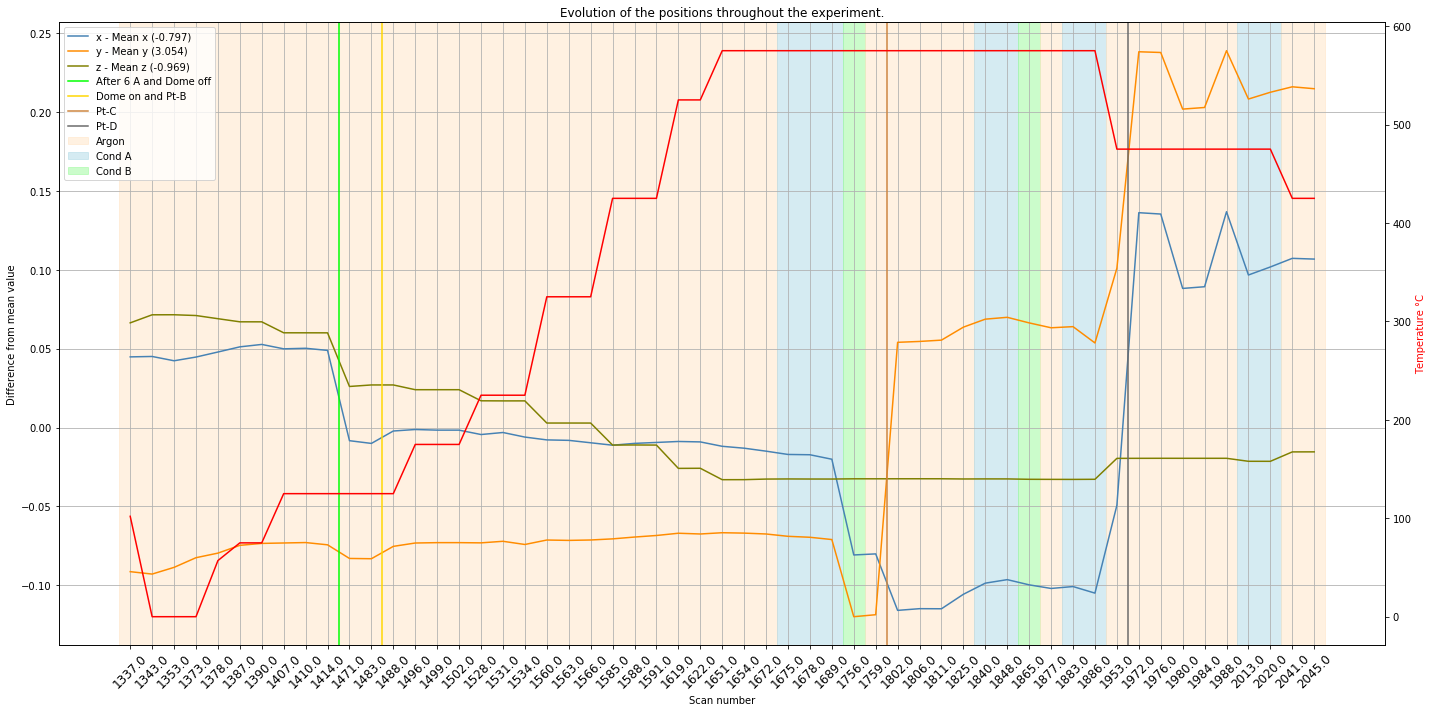

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (20,10))
ax.grid()

# Choose colors
colors = ["steelblue", "darkorange", "olive"]

# Mean values
mean_x = np.round(data["x"].values.mean(), 3)
mean_y = np.round(data["y"].values.mean(), 3)
mean_z = np.round(data["z"].values.mean(), 3)

# Plot positions
ax.plot(data.index, data["x"] - mean_x, label = f"x - Mean x ({mean_x})", color = colors[0])
ax.plot(data.index, data["y"] - mean_y, label = f"y - Mean y ({mean_y})", color = colors[1])
ax.plot(data.index, data["z"] - mean_z, label = f"z - Mean z ({mean_z})", color = colors[2])

# Add another ax
ax2 = ax.twinx() 
ax2.plot(data.index, data["Temp"], label = "temperature", color = 'r')

# Giving labels to the axises 
ax.set_xlabel('Scan number') 
ax.set_ylabel('Difference from mean value')
ax2.set_ylabel('Temperature °C', color = 'r')

# Notable changes as vertical lines
# ax.axvline(8.5, color = mcolors.CSS4_COLORS["chartreuse"], label = "Before OUPS 06")
ax.axvline(9.5, color = mcolors.CSS4_COLORS["lime"], label = "After 6 A and Dome off")
ax.axvline(11.5, color = mcolors.CSS4_COLORS["gold"], label = "Dome on and Pt-B")
ax.axvline(34.5, color = mcolors.CSS4_COLORS["peru"], label = "Pt-C")
ax.axvline(45.5, color = mcolors.CSS4_COLORS["dimgray"], label = "Pt-D")

# Gaz conditions
ax.axvspan(-0.5, 29.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"], label = "Argon")
ax.axvspan(29.5, 32.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"], label = "Cond A")
ax.axvspan(32.5, 33.5, alpha=0.5, color=mcolors.CSS4_COLORS["palegreen"], label = "Cond B")
ax.axvspan(33.5, 38.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(38.5, 40.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(40.5, 41.5, alpha=0.5, color=mcolors.CSS4_COLORS["palegreen"],)
ax.axvspan(41.5, 42.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(42.5, 44.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(44.5, 50.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(50.5, 52.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(52.5, 54.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])

# Add legend
ax.legend()

# Add ticks
ax.set_xticks(data.index)
ax.set_xticklabels(data["scan_nb"], fontsize=12, rotation = "45")

# Save plot 
plt.title("Evolution of the positions throughout the experiment.")
plt.tight_layout() 
plt.savefig("Images/Positions_vs_Temp.png")

# Plot roi 1

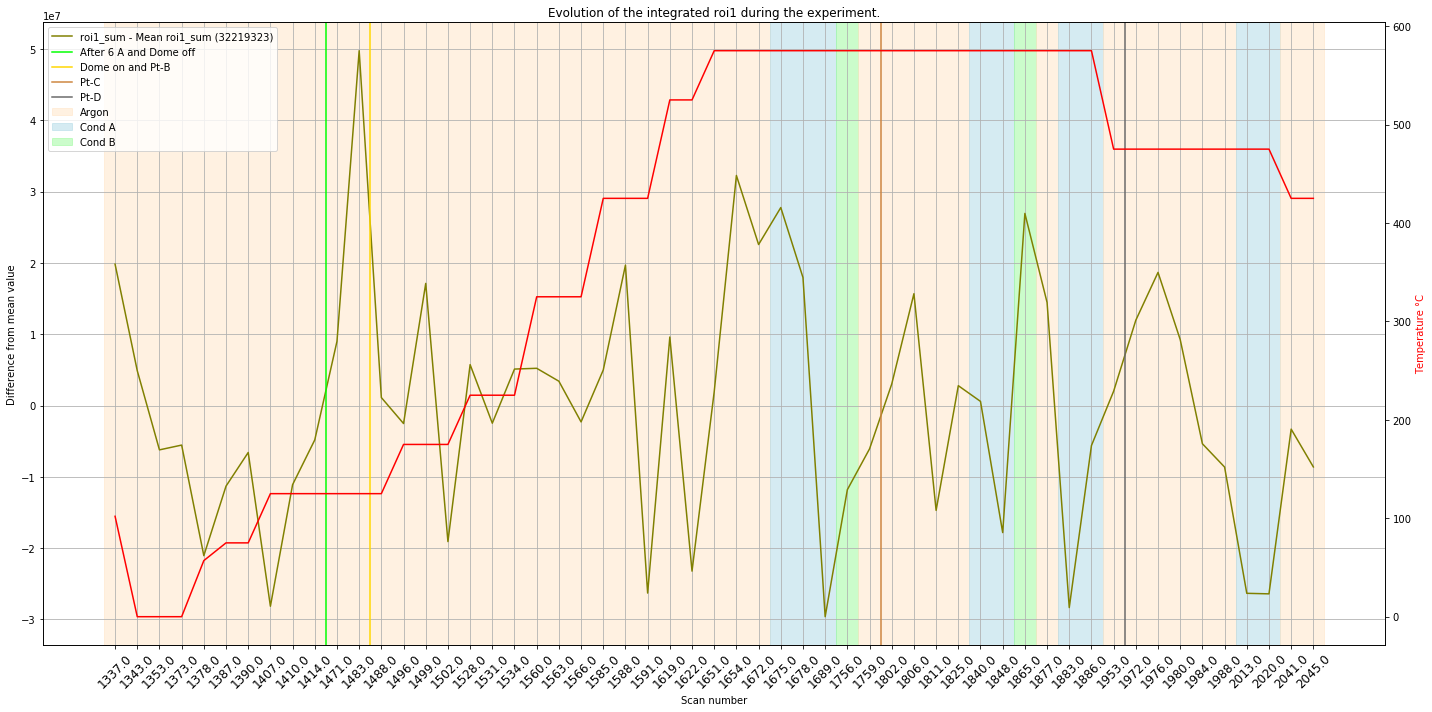

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (20,10))
ax.grid()

# Choose colors
colors = ["steelblue", "darkorange", "olive"]

# Mean values
mean_roi1_sum = int(np.mean(data["roi1_sum"].values))

# Plot positions
ax.plot(data.index, data["roi1_sum"] - mean_roi1_sum, label = f"roi1_sum - Mean roi1_sum ({mean_roi1_sum})", color = colors[2])

# Add another ax
ax2 = ax.twinx() 
ax2.plot(data.index, data["Temp"], label = "temperature", color = 'r')

# Giving labels to the axises 
ax.set_xlabel('Scan number') 
ax.set_ylabel('Difference from mean value')
ax2.set_ylabel('Temperature °C', color = 'r')

# Notable changes as vertical lines
# ax.axvline(8.5, color = mcolors.CSS4_COLORS["chartreuse"], label = "Before OUPS 06")
ax.axvline(9.5, color = mcolors.CSS4_COLORS["lime"], label = "After 6 A and Dome off")
ax.axvline(11.5, color = mcolors.CSS4_COLORS["gold"], label = "Dome on and Pt-B")
ax.axvline(34.5, color = mcolors.CSS4_COLORS["peru"], label = "Pt-C")
ax.axvline(45.5, color = mcolors.CSS4_COLORS["dimgray"], label = "Pt-D")

# Gaz conditions
ax.axvspan(-0.5, 29.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"], label = "Argon")
ax.axvspan(29.5, 32.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"], label = "Cond A")
ax.axvspan(32.5, 33.5, alpha=0.5, color=mcolors.CSS4_COLORS["palegreen"], label = "Cond B")
ax.axvspan(33.5, 38.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(38.5, 40.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(40.5, 41.5, alpha=0.5, color=mcolors.CSS4_COLORS["palegreen"],)
ax.axvspan(41.5, 42.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(42.5, 44.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(44.5, 50.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(50.5, 52.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(52.5, 54.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])

# Add legend
ax.legend()

# Add ticks
ax.set_xticks(data.index)
ax.set_xticklabels(data["scan_nb"], fontsize=12, rotation = "45")

# Save plot 
plt.title("Evolution of the integrated roi1 during the experiment.")
plt.tight_layout() 
plt.savefig("Images/Mean_Roi1_Sum_vs_Temp.png")

# Plot Roi 4

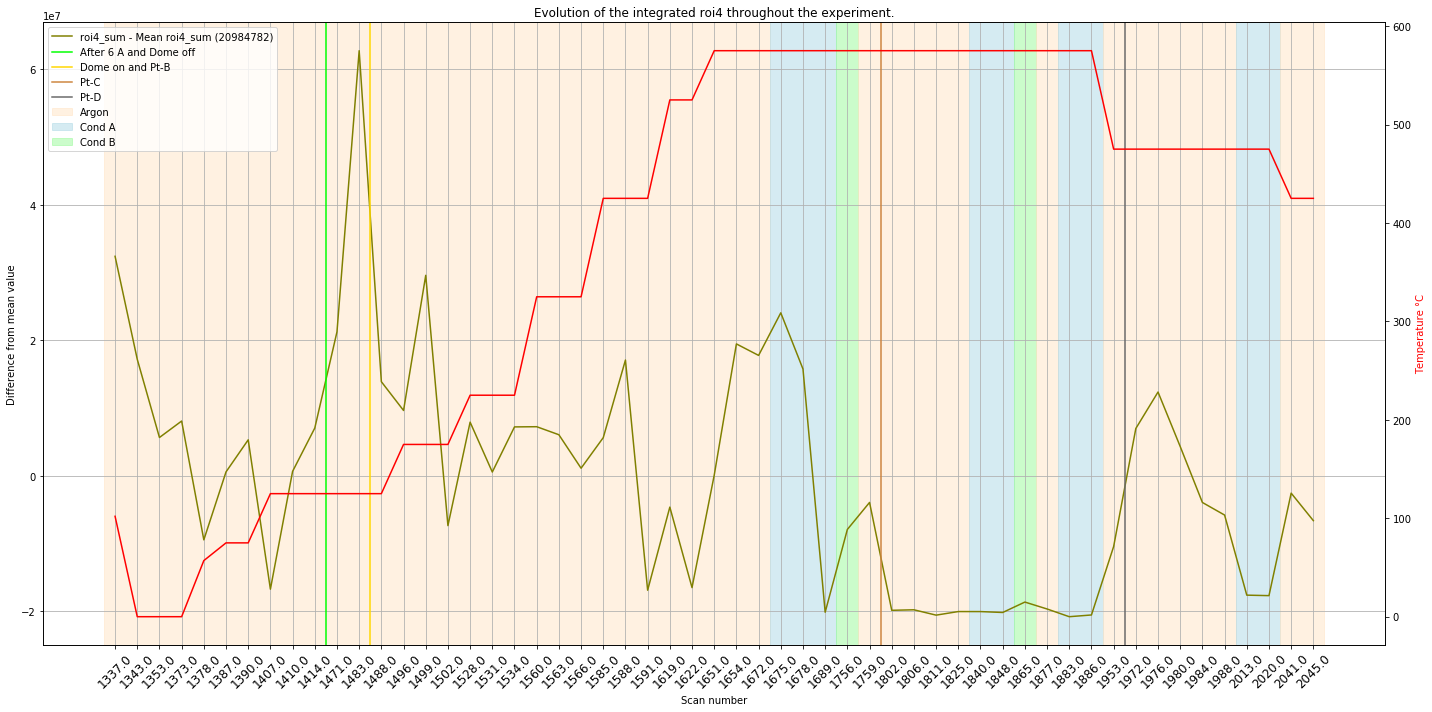

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (20,10))
ax.grid()

# Choose colors
colors = ["steelblue", "darkorange", "olive"]

# Mean values
mean_roi4_sum = int(np.mean(data["roi4_sum"].values))

# Plot positions
ax.plot(data.index, data["roi4_sum"] - mean_roi4_sum, label = f"roi4_sum - Mean roi4_sum ({mean_roi4_sum})", color = colors[2])

# Add another ax
ax2 = ax.twinx() 
ax2.plot(data.index, data["Temp"], label = "temperature", color = 'r')

# Giving labels to the axises 
ax.set_xlabel('Scan number') 
ax.set_ylabel('Difference from mean value')
ax2.set_ylabel('Temperature °C', color = 'r')

# Notable changes as vertical lines
# ax.axvline(8.5, color = mcolors.CSS4_COLORS["chartreuse"], label = "Before OUPS 06")
ax.axvline(9.5, color = mcolors.CSS4_COLORS["lime"], label = "After 6 A and Dome off")
ax.axvline(11.5, color = mcolors.CSS4_COLORS["gold"], label = "Dome on and Pt-B")
ax.axvline(34.5, color = mcolors.CSS4_COLORS["peru"], label = "Pt-C")
ax.axvline(45.5, color = mcolors.CSS4_COLORS["dimgray"], label = "Pt-D")

# Gaz conditions
ax.axvspan(-0.5, 29.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"], label = "Argon")
ax.axvspan(29.5, 32.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"], label = "Cond A")
ax.axvspan(32.5, 33.5, alpha=0.5, color=mcolors.CSS4_COLORS["palegreen"], label = "Cond B")
ax.axvspan(33.5, 38.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(38.5, 40.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(40.5, 41.5, alpha=0.5, color=mcolors.CSS4_COLORS["palegreen"],)
ax.axvspan(41.5, 42.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(42.5, 44.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(44.5, 50.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(50.5, 52.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(52.5, 54.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])

# Add legend
ax.legend()

# Add ticks
ax.set_xticks(data.index)
ax.set_xticklabels(data["scan_nb"], fontsize=12, rotation = "45")

# Save plot 
plt.title("Evolution of the integrated roi4 throughout the experiment.")
plt.tight_layout() 
plt.savefig("Images/Mean_Roi4_Sum_vs_Temp.png")

# Plot angles

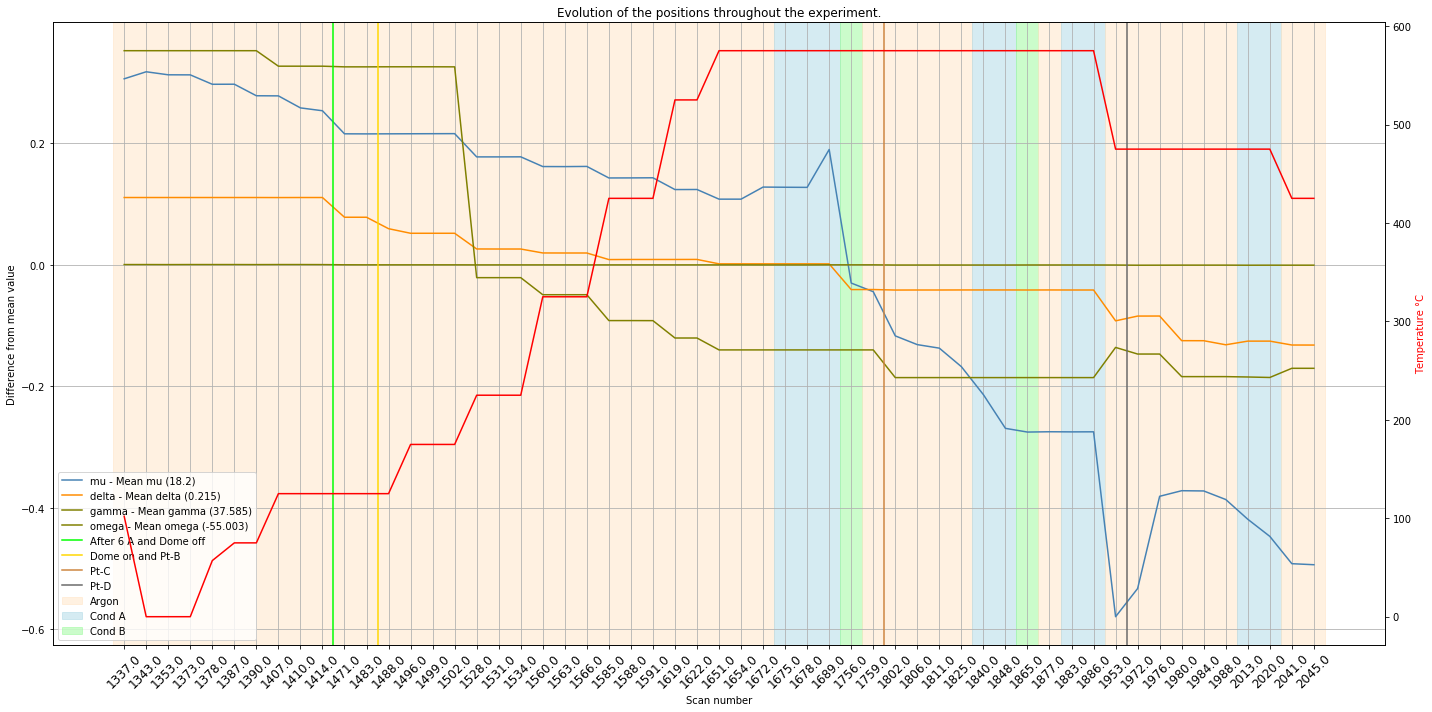

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (20,10))
ax.grid()

# Choose colors
colors = ["steelblue", "darkorange", "olive"]

# Mean values
mean_mu = np.round(data["mu"].values.mean(), 3)
mean_delta = np.round(data["delta"].values.mean(), 3)
mean_gamma = np.round(data["gamma"].values.mean(), 3)
mean_omega = np.round(data["omega"].values.mean(), 3)

# Plot positions
ax.plot(data.index, data["mu"] - mean_mu, label = f"mu - Mean mu ({mean_mu})", color = colors[0])
ax.plot(data.index, data["delta"] - mean_delta, label = f"delta - Mean delta ({mean_delta})", color = colors[1])
ax.plot(data.index, data["gamma"] - mean_gamma, label = f"gamma - Mean gamma ({mean_gamma})", color = colors[2])
ax.plot(data.index, data["omega"] - mean_omega, label = f"omega - Mean omega ({mean_omega})", color = colors[2])

# Add another ax
ax2 = ax.twinx() 
ax2.plot(data.index, data["Temp"], label = "temperature", color = 'r')

# Giving labels to the axises 
ax.set_xlabel('Scan number') 
ax.set_ylabel('Difference from mean value')
ax2.set_ylabel('Temperature °C', color = 'r')

# Notable changes as vertical lines
# ax.axvline(8.5, color = mcolors.CSS4_COLORS["chartreuse"], label = "Before OUPS 06")
ax.axvline(9.5, color = mcolors.CSS4_COLORS["lime"], label = "After 6 A and Dome off")
ax.axvline(11.5, color = mcolors.CSS4_COLORS["gold"], label = "Dome on and Pt-B")
ax.axvline(34.5, color = mcolors.CSS4_COLORS["peru"], label = "Pt-C")
ax.axvline(45.5, color = mcolors.CSS4_COLORS["dimgray"], label = "Pt-D")

# Gaz conditions
ax.axvspan(-0.5, 29.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"], label = "Argon")
ax.axvspan(29.5, 32.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"], label = "Cond A")
ax.axvspan(32.5, 33.5, alpha=0.5, color=mcolors.CSS4_COLORS["palegreen"], label = "Cond B")
ax.axvspan(33.5, 38.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(38.5, 40.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(40.5, 41.5, alpha=0.5, color=mcolors.CSS4_COLORS["palegreen"],)
ax.axvspan(41.5, 42.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(42.5, 44.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(44.5, 50.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])
ax.axvspan(50.5, 52.5, alpha=0.5, color=mcolors.CSS4_COLORS["lightblue"])
ax.axvspan(52.5, 54.5, alpha=0.5, color=mcolors.CSS4_COLORS["bisque"])

# Add legend
ax.legend()

# Add ticks
ax.set_xticks(data.index)
ax.set_xticklabels(data["scan_nb"], fontsize=12, rotation = "45")

# Save plot 
plt.title("Evolution of the positions throughout the experiment.")
plt.tight_layout() 
plt.savefig("Images/Angles_vs_Temp.png")